<a href="https://colab.research.google.com/github/DianaBarradasSanchez/EDPI/blob/main/Sturm_Lieville.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Verificación de Sturm–Liouville:
p(x) = e^{2x} > 0, sigma(x) = e^{2x} > 0, q(x) continua
⇒ Es un problema de Sturm–Liouville regular

Coeficientes c_n (solo n impares):
n = 1, c_n = 1.273240
n = 3, c_n = 0.424413
n = 5, c_n = 0.254648
n = 7, c_n = 0.181891
n = 9, c_n = 0.141471
n = 11, c_n = 0.115749
n = 13, c_n = 0.097942
n = 15, c_n = 0.084883
n = 17, c_n = 0.074896
n = 19, c_n = 0.067013


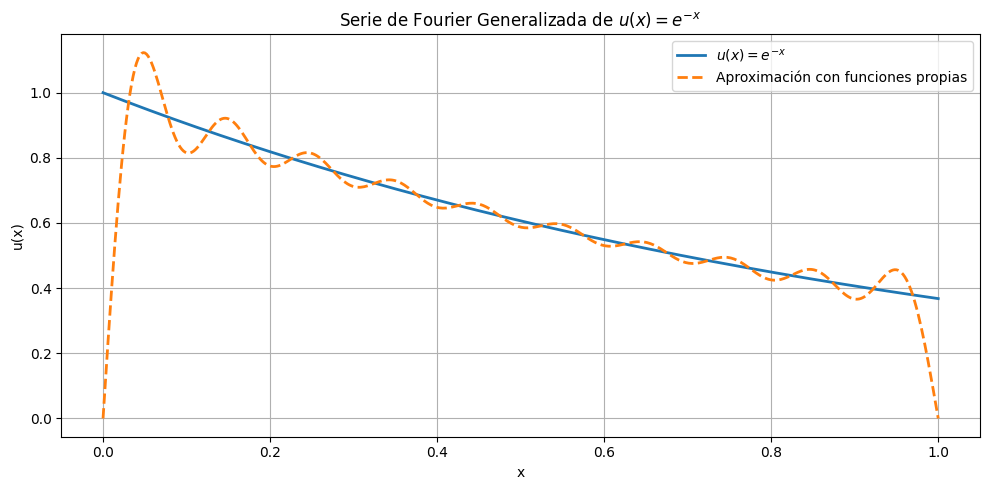

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import pi, exp


# Verificando si es un problema de Sturm–Liouville
# La ecuación es: f'' + 2f' + λf = 0
# Multiplicamos por μ(x) = e^{∫2dx} = e^{2x}
# Se convierte en: (e^{2x}f')' + λ e^{2x} f = 0
# Entonces:
p = lambda x: np.exp(2 * x)
q = lambda x: 0
sigma = lambda x: np.exp(2 * x)

print("Verificación de Sturm–Liouville:")
print("p(x) = e^{2x} > 0, sigma(x) = e^{2x} > 0, q(x) continua")
print("⇒ Es un problema de Sturm–Liouville regular\n")


# Eigenvalores: λ_n = n²π² + 1
def eigenvalue(n):
    return n**2 * pi**2 + 1

# Eigenfunciones: f_n(x) = e^{-x} sin(nπx)
def eigenfunction(n, x):
    return np.exp(-x) * np.sin(n * pi * x)

# Función a expandir:
def u(x):
    return np.exp(-x)


# Coeficientes c_n con  σ(x) = e^{2x}


def coef_cn(n):
    num = quad(lambda x: u(x) * eigenfunction(n, x) * np.exp(2 * x), 0, 1)[0]
    den = quad(lambda x: eigenfunction(n, x)**2 * np.exp(2 * x), 0, 1)[0]
    return num / den


# Serie de fourier generalizada


N = 20  # número de términos
x_vals = np.linspace(0, 1, 500)
u_exact = u(x_vals)
u_approx = np.zeros_like(x_vals)
coef_list = []

for n in range(1, N + 1):
    if n % 2 == 0:
        continue  # coeficientes pares son cero
    cn = coef_cn(n)
    u_approx += cn * eigenfunction(n, x_vals)
    coef_list.append((n, cn))


# Coeficientes c_n


print("Coeficientes c_n (solo n impares):")
for n, cn in coef_list:
    print(f"n = {n}, c_n = {cn:.6f}")


# Graficando


plt.figure(figsize=(10, 5))
plt.plot(x_vals, u_exact, label=r'$u(x) = e^{-x}$', lw=2)
plt.plot(x_vals, u_approx, '--', label='Aproximación con funciones propias', lw=2)
plt.title('Serie de Fourier Generalizada de $u(x) = e^{-x}$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()